<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2024/blob/main/Sleep_stages_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and install libraries

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Initialization

In [2]:
columns_to_read = ['1 LDF', '1 T', 'Sleep stages']
t_lower_bound = 35
big_file_no = 3

# Dictionary to map strings to integers
replacement_dict = {
    'W' : 0,
    'N2': 1,
    'N3': 2,
    'R' : 3
}

# Download data

In [3]:
# GitHub repository URL
repo_url = "https://github.com/kotosham/sleep-stages"

# Raw files URLs
download_files = ['1.csv', '2.csv', '3-1.csv', '3-2.csv',
                  '4.csv', '5.csv', '6.csv', '7.csv']
# files_with_subfiles = ['3']

for i in download_files:
  file_url = f"{repo_url}/raw/main/{i}"
  # Download the file
  response = requests.get(file_url)
  # Check if the request was successful
  if response.status_code == 200:
      # Save the content to a local file
      with open(i, "wb") as file:
          file.write(response.content)
  else:
      print(f"Failed to download the file. Status code: {response.status_code}")

Concatinate parts of a big file and visualize its columns

In [4]:
dfs = []
df_3_1 = pd.read_csv('3-1.csv', usecols=columns_to_read)
dfs.append(df_3_1)
df_3_2 = pd.read_csv('3-2.csv', usecols=columns_to_read)
dfs.append(df_3_2)
df = pd.concat(dfs, ignore_index=True)

# Replace NaN values with the mean of their respective columns
# df.replace('#DIV/0!', 0)
df.dropna()
df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)
# df[columns_to_read[-1]] = df[columns_to_read[-1]].astype(int)
# df[columns_to_read[-1]] = df[columns_to_read[-1]].clip(lower=t_lower_bound)

df[columns_to_read[1]] = df[columns_to_read[1]].clip(lower=t_lower_bound)
# df_3(df_3.mean(), inplace=True)

print(df.head())

   1 LDF   1 T  Sleep stages
0   20.4  35.0           0.0
1   20.4  35.0           0.0
2   20.4  35.0           0.0
3   20.4  35.0           0.0
4   17.2  35.0           0.0


<ipython-input-4-0e0fe802c67c>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_read[-1]] = df[columns_to_read[-1]].replace(replacement_dict)


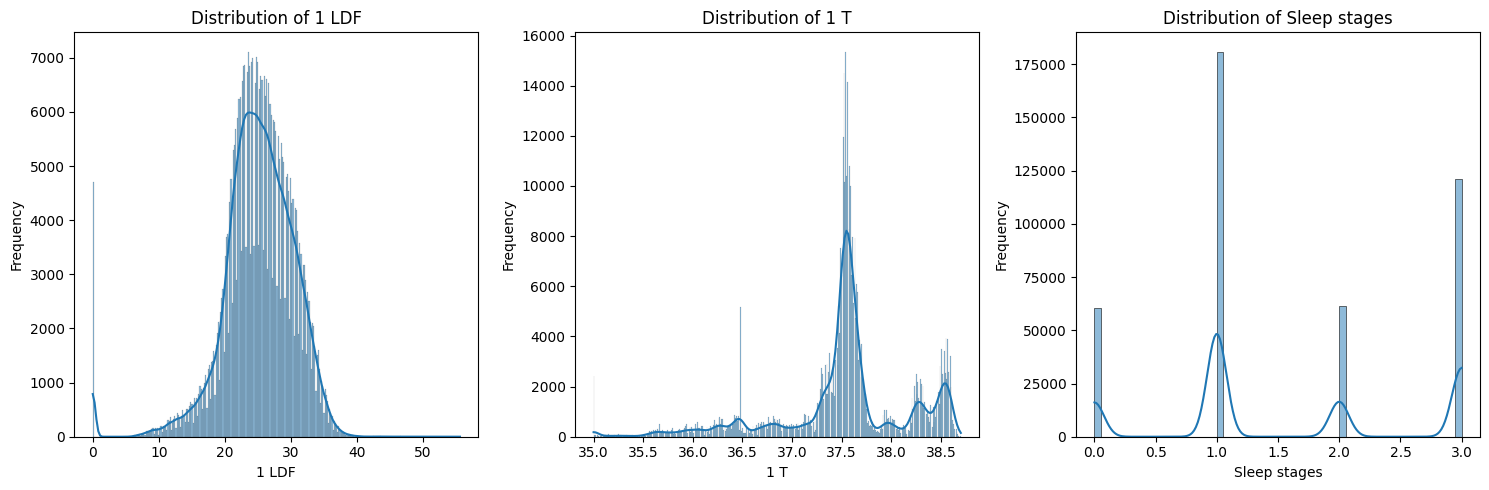

In [5]:
# Create a figure with len(columns_to_download) subplots in one line
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot the first three columns in the subplots
for i, column in enumerate(columns_to_read):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Collect all the files into a list of data frames

In [6]:
num_volunteers = (len(download_files) - 1)
files = [1]*num_volunteers
for i in range(num_volunteers):
  if i + 1 != big_file_no:
    f"{repo_url}/raw/main/{i}"
    files[i] = pd.read_csv(f"{i+1}.csv", usecols=columns_to_read)
    files[i].dropna()
    files[i][columns_to_read[-1]] = files[i][columns_to_read[-1]].replace(replacement_dict)
    # files[i].replace('#DIV/0!', '0.0')
    files[i][columns_to_read[1]] = files[i][columns_to_read[1]].clip(lower=t_lower_bound)

<ipython-input-6-47e1c7093b65>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  files[i][columns_to_read[-1]] = files[i][columns_to_read[-1]].replace(replacement_dict)
<ipython-input-6-47e1c7093b65>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  files[i][columns_to_read[-1]] = files[i][columns_to_read[-1]].replace(replacement_dict)
<ipython-input-6-47e1c7093b65>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obje

In [7]:
files

[        1 LDF    1 T  Sleep stages
 0        18.1  35.00           0.0
 1        18.1  35.00           0.0
 2        18.1  35.00           0.0
 3        18.1  35.00           0.0
 4        19.3  35.00           0.0
 ...       ...    ...           ...
 191696   22.0  36.83           1.0
 191697   21.7  36.83           1.0
 191698   21.7  36.83           1.0
 191699   21.7  36.83           1.0
 191700   21.7  36.83           1.0
 
 [191701 rows x 3 columns],
         1 LDF    1 T  Sleep stages
 0        22.2  35.00             0
 1        22.2  35.00             0
 2        22.2  35.00             0
 3        24.5  35.00             0
 4        24.5  35.00             0
 ...       ...    ...           ...
 211019   24.0  37.34             0
 211020   24.0  37.34             0
 211021   23.9  37.32             0
 211022   23.9  37.32             0
 211023   23.9  37.32             0
 
 [211024 rows x 3 columns],
 1,
         1 LDF    1 T  Sleep stages
 0        24.7  36.46           0.0


In [10]:
k = 0
files[k].min(), files[k].max()

(1 LDF            3.7
 1 T             35.0
 Sleep stages     0.0
 dtype: float64,
 1 LDF           59.00
 1 T             38.41
 Sleep stages     3.00
 dtype: float64)